In [5]:
from photonic_network import network
from photonic_neuron import neuron
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

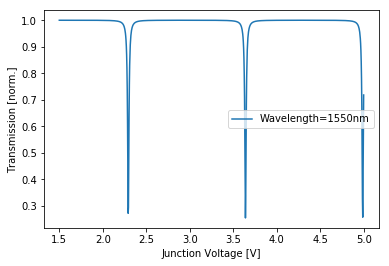

In [6]:
net = network([[8.5, 10]])
net.plotModulators()

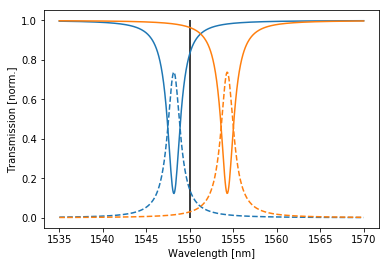

In [7]:
net.neurons[0].plotWeightBank()

/Users/Hugh/code/Python/Thesis/SiPhotoNet/photonic_neuron.py:83: RuntimeWarning: invalid value encountered in double_scalars
  approx = -(8.8e-22*Ne + 8.5e-18*Nh**0.8)


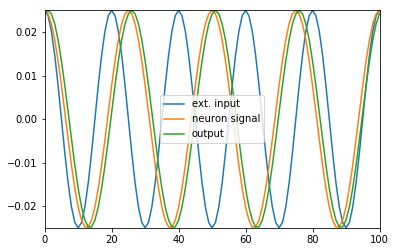

In [13]:
T = 1000
inputPump = [np.cos(2*math.pi*t/20.0) for t in range(T)]
neuronPump = [np.cos(2*math.pi*t/25.0) for t in range(T)]

sim = net.simulate(pumpSignals = [copy.deepcopy(neuronPump), copy.deepcopy(inputPump)])
output = []
done = False
while not done:
    try:
        next(sim)
        output.append(net.getState(1))
    except:
        done = True
        
plt.plot([t for t in range(T)], [25e-3*i for i in inputPump])
plt.plot([t for t in range(T)], [25e-3*i for i in neuronPump])
plt.plot([t for t in range(T)], output[:-1])
plt.axis([0,100,-25e-3,25e-3])
plt.legend(['ext. input','neuron signal','output'])